In [51]:
#load modules
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import json 
import requests
from config import api_key


In [52]:
#BLS url
endpoint = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

#timeseries of monthly unemployment data to query
series = ['LNS14000000','LNS14000006','LNS14000009','LNS14032183','LNS14000003','LNS13025703'] 
startyear = '2018'
endyear = '2020'


#setup json request
headers = {'Content-type': 'application/json'}
data = json.dumps(
    {"seriesid": series,
     "registrationkey": api_key,
     "startyear":startyear, 
     "endyear":endyear})

stat = requests.post(endpoint, data=data, headers=headers)
stat_data = json.loads(stat.text)
#stat = requests.post(endpoint, data=data, headers=headers)


#setup lists to hold stats
seriesid = []
year= []
period = []
periodName = []
value = []

for series in stat_data['Results']['series']:
    seriesId = series['seriesID']
    for data in series['data']:
        year.append(data['year'])
        period.append(data['period'])
        periodName.append(data['periodName'])
        value.append(data['value'])
        seriesid.append(series['seriesID'])
 

In [53]:
#create dataframe
unemployment_df = pd.DataFrame({
    "Series":seriesid,
    "Year": year,
    "Month Code": period,
    "Month": periodName,
    "Unemployment Rate": value
})

unemployment_df.head()

,Series,Year,Month Code,Month,Unemployment Rate
0,LNS14000000,2020,M10,October,6.9
1,LNS14000000,2020,M09,September,7.9
2,LNS14000000,2020,M08,August,8.4
3,LNS14000000,2020,M07,July,10.2
4,LNS14000000,2020,M06,June,11.1


In [54]:
#Add combined Mth and Year column
unemployment_df['Mth/Year'] = pd.to_datetime(unemployment_df['Month'].astype(str)+unemployment_df['Year'], format='%B%Y')

#convert Unemployment Rate to numeric to get max and min
unemployment_df['Unemployment Rate'] = pd.to_numeric(unemployment_df['Unemployment Rate'])

#sort values
unemployment_df = unemployment_df.sort_values(by=['Series','Mth/Year'], ascending=[True,True], inplace=False, ignore_index=True)

#verify sort and check min, max
unemployment_df.head(),unemployment_df['Unemployment Rate'].min(), unemployment_df['Unemployment Rate'].max()

(        Series  Year Month Code     Month  Unemployment Rate   Mth/Year
 0  LNS13025703  2018        M01   January               21.9 2018-01-01
 1  LNS13025703  2018        M02  February               21.2 2018-02-01
 2  LNS13025703  2018        M03     March               20.6 2018-03-01
 3  LNS13025703  2018        M04     April               20.4 2018-04-01
 4  LNS13025703  2018        M05       May               19.4 2018-05-01,
 2.1,
 32.5)

In [55]:
#drop Month and Year
unemployment_df = unemployment_df.drop(['Year','Month'], axis=1)

unemployment_df.head()

,Series,Month Code,Unemployment Rate,Mth/Year
0,LNS13025703,M01,21.9,2018-01-01
1,LNS13025703,M02,21.2,2018-02-01
2,LNS13025703,M03,20.6,2018-03-01
3,LNS13025703,M04,20.4,2018-04-01
4,LNS13025703,M05,19.4,2018-05-01


In [56]:
#series description
#'LNS14000000' is 'Unemployment Rate'
#'LNS14000006' is 'Unemployment-AfricanAmerican'
#'LNS14000009' is 'Unemployment-Hispanic'
#'LNS14032183' is 'Unemployment-Asian'
#'LNS14000003' is 'Unemployment-White'
#'LNS13025703' is 'Long-Term Unemployment Rate'

In [57]:
#Isolating the unemployment rate
unerate = unemployment_df.loc[unemployment_df['Series'] == 'LNS14000000',:]
uneafam = unemployment_df.loc[unemployment_df['Series'] == 'LNS14000006',:]
unehisp = unemployment_df.loc[unemployment_df['Series'] == 'LNS14000009',:]
uneasian = unemployment_df.loc[unemployment_df['Series'] =='LNS14032183',:]
unewhite = unemployment_df.loc[unemployment_df['Series'] =='LNS14000003',:]
ltunemp = unemployment_df.loc[unemployment_df['Series'] == 'LNS13025703',:]


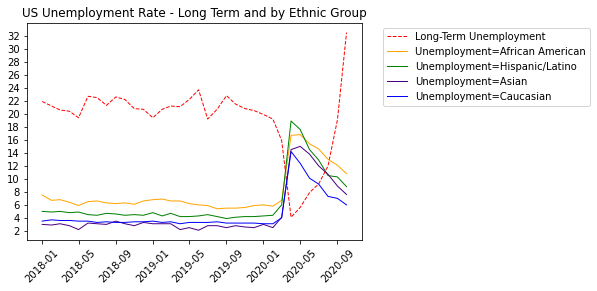

<Figure size 1440x2160 with 0 Axes>

In [75]:
#line graph of x and y axis

#setting x axis 
years = ltunemp['Mth/Year']

#setting y axis 
total, = plt.plot(years, ltunemp['Unemployment Rate'], color='red', label = 'Long-Term Unemployment',linewidth =1, linestyle = '--') 
afam, = plt.plot(years, uneafam['Unemployment Rate'], color= 'orange', label = "Unemployment=African American", linewidth=1) 
hisp, = plt.plot(years, unehisp['Unemployment Rate'], color= 'green', label = "Unemployment=Hispanic/Latino", linewidth=1) 
asian, = plt.plot(years, uneasian['Unemployment Rate'], color= 'indigo', label = "Unemployment=Asian", linewidth=1) 
white, = plt.plot(years, unewhite['Unemployment Rate'], color= 'blue', label = "Unemployment=Caucasian", linewidth=1)

#setting properties 
plt.yticks(np.arange(round(unemployment_df['Unemployment Rate'].min()), 
                     round(unemployment_df['Unemployment Rate'].max()) +1, 2.0))  
plt.xticks(rotation=45)
plt.title("US Unemployment Rate - Long Term and by Ethnic Group")  

#set legend outside of box 
plt.legend(bbox_to_anchor=(1.05, 1),handles=[total, afam, hisp, asian, white])
plt.figure(figsize=(20,30)) 
plt.tight_layout() 
plt.show()

In [ ]:
#Observations
#With the pandemic, 
#1. Long-term unemployment (people who are out of work 27 weeks or longer as a percent of total unemployed) 
#   has increased 8-fold.
#2. The Hispanic/Latino community had the highest unemployment at the onset of the pandemic, but has seen the
#   most dramatic improvement since.
#3. The African-American group continues to be the most impacted by the pandemic.